
 CNN using the MNIST dataset from Zalando

 input data is shaped as 4D tensors of shape (samples, height, width, channels)
 and passed through several convolutional layers and max pooling layers
 before being flattened and passed.
 The convolutional layer applies the convolution operation to the input image
 using a set of learned filters, generating a feature map that captures
 patterns and features of the input image.  The activation function then
 applies a non-linear transformation to the feature map.

 In convolutional neural networks, it is common to increase the number of
 filters in each convolutional layer to capture more complex and higher-level
 features in the data. The deeper layers of a convolutional neural network
 typically have more filters than the earlier layers. The exact number of
 filters used for each layer depends on the complexity of the problem and
 the size of the dataset.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2024-04-12 10:56:17.739113: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-12 10:56:17.769745: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the MNIST Fashion dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# Normalize pixel values to between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
# Reshape the input data to (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# Define the CNN model
# the Conv2D layer in the model expects input data with four dimensions,
# where the last dimension is the number of color channels, in this case
# normalized greyscale values.
model = keras.Sequential([
# create a class for a 2D convolutional layer in Keras with a 3x3 2D kernel
# size. The first argument 32 is the number of filters in the layer.
# the 32 filters are separate 2D kernels that slide over the input image or
# feature map to produce 32 output feature maps. The filters are applied
# to non-overlapping regions of the input. 
# As activation function ReLU (Rectified Linear Unit) is used. The input
# shape is a 3D tensor with shape of 28x28x1 
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
# Max pooling is a type of down-sampling operation by partitioning the
# input image into a set of non-overlapping rectangular regions and,
# for each region, selecting the maximum value. The output of this operation
# is a feature map with reduced spatial dimensions, but with retained
# important features.
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # include dropping of layers to prevent overfitting
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
# input a vector of size 784 (the flattened image), multiplies it by a weight
# matrix of size (784, 128), adds a bias vector of size 128, and applies the
# ReLU activation function element-wise to the resulting vector of size 128. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6471 - accuracy: 0.7634 - val_loss: 0.4002 - val_accuracy: 0.8567
Epoch 2/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4452 - accuracy: 0.8403 - val_loss: 0.3294 - val_accuracy: 0.8792
Epoch 3/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3893 - accuracy: 0.8596 - val_loss: 0.3065 - val_accuracy: 0.8863
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3566 - accuracy: 0.8719 - val_loss: 0.2855 - val_accuracy: 0.8949
Epoch 5/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3392 - accuracy: 0.8779 - val_loss: 0.2957 - val_accuracy: 0.8901
Epoch 6/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3207 - accuracy: 0.8851 - val_loss: 0.2696 - val_accuracy: 0.9003
Epoch 7/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3090 - accuracy: 0.8867 - val_loss: 0.2731 - val_ac

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - loss: 0.2502 - accuracy: 0.9102 - 629ms/epoch - 2ms/step
Test accuracy: 0.9101999998092651


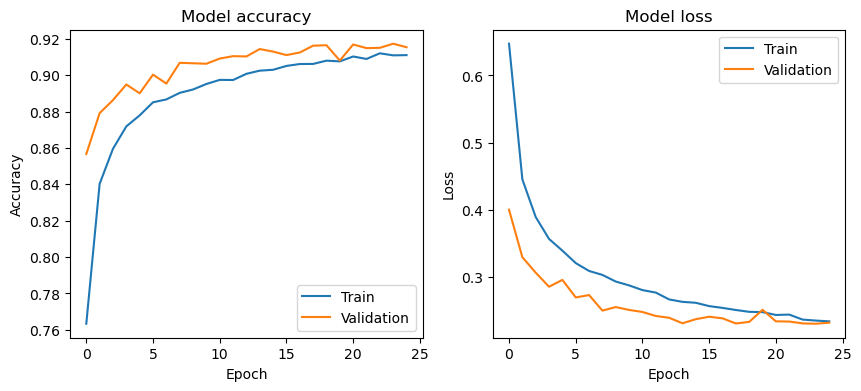

In [9]:
# Plot the training and validation accuracy and loss over time
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

plt.show()

313/313 [==============================] - 1s 2ms/step


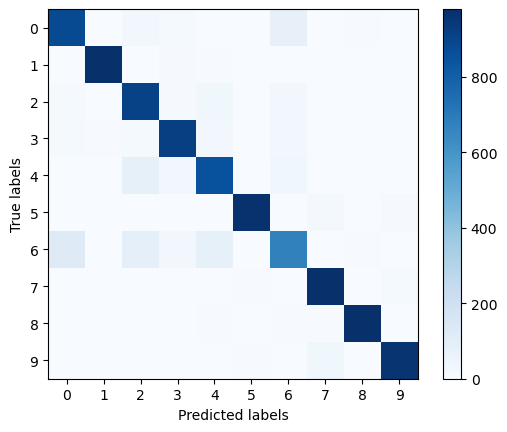

In [10]:
# Plot a confusion matrix of the test set predictions
test_preds = np.argmax(model.predict(x_test), axis=-1)
conf_mat = tf.math.confusion_matrix(y_test, test_preds)
plt.imshow(conf_mat, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.colorbar()
plt.show()

313/313 [==============================] - 1s 2ms/step


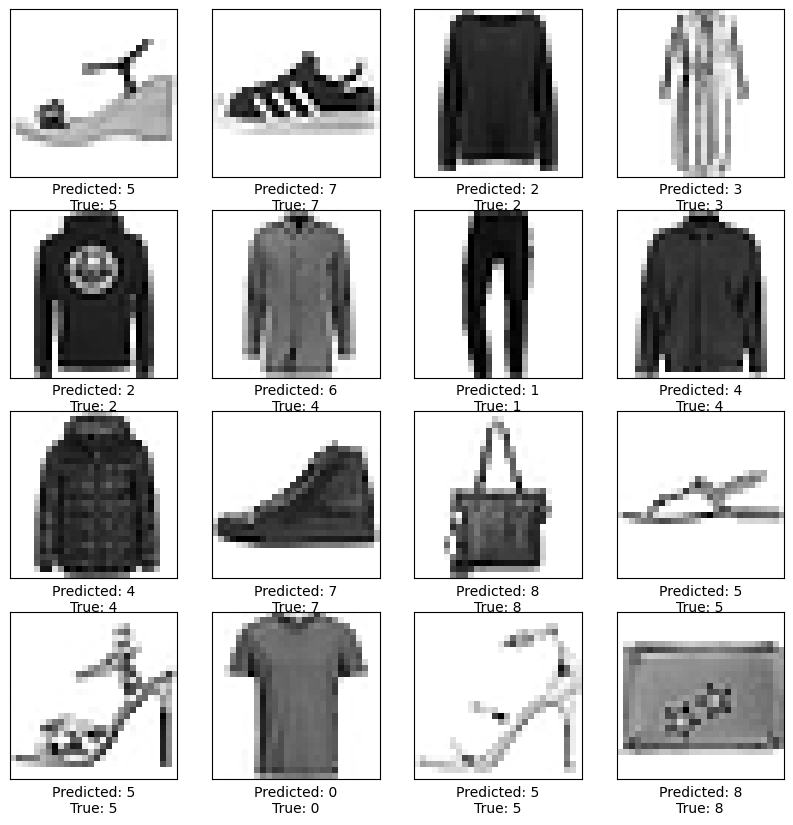

In [11]:
# Plot a random sample of test set images and their predicted labels
random_indices = np.random.choice(x_test.shape[0], 16, replace=False)
test_preds = np.argmax(model.predict(x_test), axis=-1)
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[index].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {test_preds[index]}\nTrue: {y_test[index]}")
plt.show()